In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import MeCab
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']

%matplotlib inline

# EDA

なろう小説API : https://dev.syosetu.com/man/api/

In [2]:
genre_name = ['異世界(恋愛)', '現実世界(恋愛)', 'ハイファンタジー(ファンタジー)', 'ローファンタジー(ファンタジー)', '純文学(文芸)', 'ヒューマンドラマ(文芸)', '歴史(文芸)', '推理(文芸)', 'ホラー(文芸)', 'アクション(文芸)', 'コメディー(文芸)', 'VRゲーム(SF)', '宇宙(SF)', '空想科学(SF)', 'パニック(SF)',  'ノンジャンル(ノンジャンル)', '童話(その他)', '詩(その他)', 'エッセイ(その他)', 'リプレイ(その他)', 'その他(その他)']
genre_name_simple = ['異世界', '現実世界', 'ハイファンタジー', 'ローファンタジー', '純文学', 'ヒューマンドラマ', '歴史', '推理', 'ホラー', 'アクション', 'コメディー', 'VRゲーム', '宇宙', '空想科学', 'パニック',  'ノンジャンル', '童話', '詩', 'エッセイ', 'リプレイ', 'その他']


In [3]:
detail_df = pd.read_csv('./dataset/csv/detail_text.csv').drop(['allcount'], axis=1).drop_duplicates('ncode')
detail_df.iloc[:2]

,title,ncode,userid,writer,story,biggenre,genre,gensaku,keyword,general_firstup,...,all_point,all_hyoka_cnt,sasie_cnt,kaiwaritu,novelupdated_at,updated_at,weekly_unique,Unnamed: 0,Unnamed: 0.1,text
0,阿弥陀様と量子論,N2222GK,1168250.0,ななしさん,プロモツイートしたけれど誰も答えを下さらなかったので書いてみるやつ。\n評価は別にいらないの...,99.0,9903.0,NaN,怪談 ディストピア 無間地獄 阿弥陀様 量子論 無限ループ,2020-07-31 23:18:56,...,0.0,0.0,0.0,0.0,2020-07-31 23:55:57,2020-07-31 23:58:04,0.0,0,0,阿弥陀様は衆生一切を救うまで成仏しない、とおっしゃった。\n\nそして将来成仏されることは予...
1,サメ召喚 ～勇者失格で捨て駒にされたけど、外れスキルが覚醒して世界最強になった～,N5008GJ,341953.0,結城 からく,サメ映画の視聴が趣味である俺は、異世界に召喚された。\nそこで世界平和のために勇者となるはず...,2.0,201.0,NaN,R15 残酷な描写あり 異世界転移 主人公最強 勇者 魔王 追放 復讐 無双 ハズレスキル ...,2020-07-18 18:02:46,...,796.0,89.0,0.0,12.0,2020-07-31 23:55:55,2020-07-31 23:58:04,5498.0,1,1,曇り空の下、俺は荒野の只中を歩いていた。\n\n くたびれたローブを羽織り、ねじ曲がった杖...


In [4]:
len(detail_df)

505537

In [5]:
detail_df.isnull().sum()

title                   2
ncode                   0
userid                  0
writer                 18
story                   0
biggenre                0
genre                   0
gensaku            505537
keyword             33494
general_firstup         0
general_lastup          0
novel_type              0
end                     0
general_all_no          0
length                  0
time                    0
isstop                  0
isr15                   0
isbl                    0
isgl                    0
iszankoku               0
istensei                0
istenni                 0
pc_or_k                 0
global_point            0
daily_point             0
weekly_point            0
monthly_point           0
quarter_point           0
yearly_point            0
fav_novel_cnt           0
impression_cnt          0
review_cnt              0
all_point               0
all_hyoka_cnt           0
sasie_cnt               0
kaiwaritu               0
novelupdated_at         0
updated_at  

## Global point

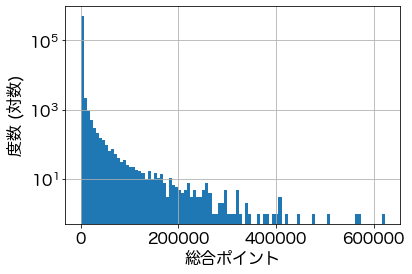

In [6]:
plt.rcParams['font.size'] = 16
plt.hist(detail_df['global_point'], bins=100, log=True)
plt.xlabel('総合ポイント')
plt.ylabel('度数 (対数)')
plt.grid()

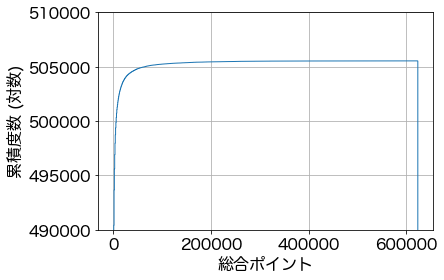

In [7]:
plt.rcParams['font.size'] = 16
plt.hist(detail_df['global_point'], bins=1000, cumulative=True, histtype="step")
plt.xlabel('総合ポイント')
plt.ylabel('累積度数 (対数)')
plt.ylim(490000, 510000)
plt.grid()

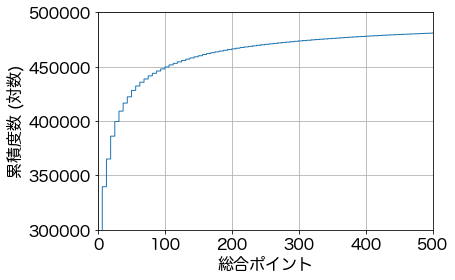

In [8]:
plt.rcParams['font.size'] = 16
plt.hist(detail_df['global_point'], bins=100000, cumulative=True, histtype="step")
plt.xlabel('総合ポイント')
plt.ylabel('累積度数 (対数)')
plt.ylim(300000, 500000)
plt.xlim(0, 500)
plt.grid()

In [9]:
print('評価0の作品の割合: ', np.around(np.sum(detail_df['global_point']==0)/len(detail_df), 3))
print('評価100以下の作品の割合: ', np.around(np.sum(detail_df['global_point']<=100)/len(detail_df), 3))

評価0の作品の割合:  0.408
評価100以下の作品の割合:  0.887


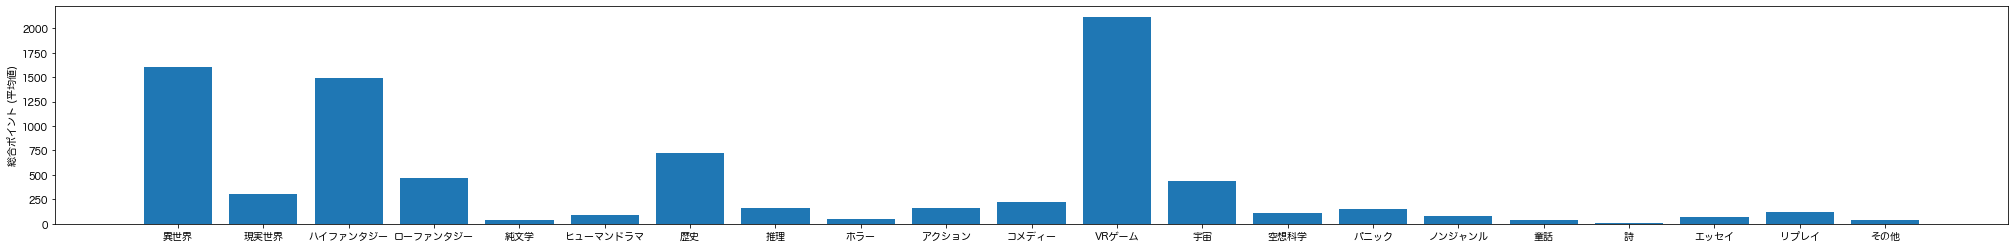

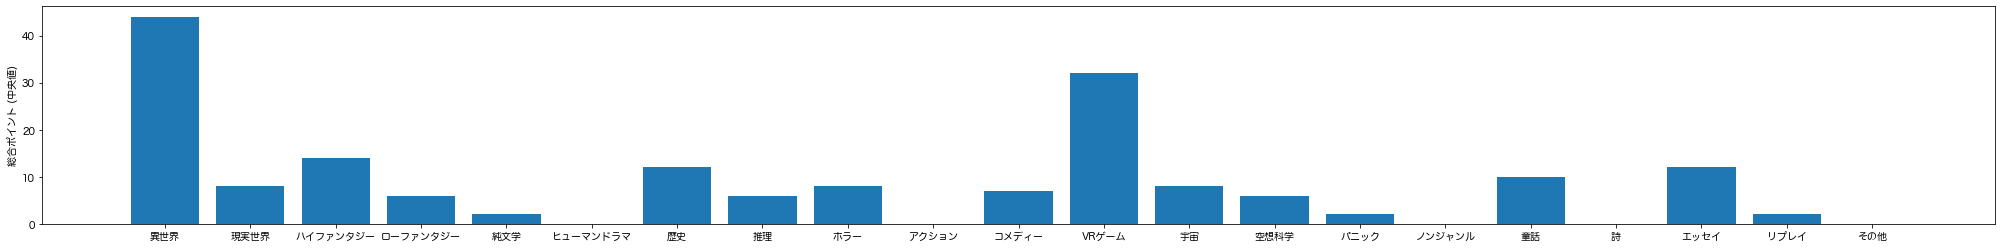

In [10]:
plt.rcParams['font.size'] = 10

plt.figure(figsize=(35, 4))
plt.bar(genre_name_simple, list(detail_df.groupby('genre').mean()['global_point']))
plt.ylabel('総合ポイント (平均値)')
plt.show()

plt.figure(figsize=(35, 4))
plt.bar(genre_name_simple, list(detail_df.groupby('genre').median()['global_point']))
plt.ylabel('総合ポイント (中央値)')
plt.show()

ジャンルによって評価の付きやすさは様々で、異世界やVRゲームは評価が付きやすく、ヒューマンドラマやアクション、ノンジャンルは評価が付きにくい傾向にある。

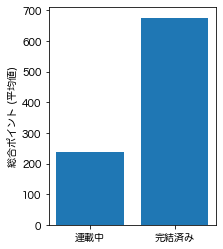

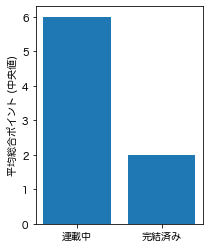

In [11]:
plt.rcParams['font.size'] = 10

plt.figure(figsize=(3, 4))
plt.bar(['連載中', '完結済み'], list(detail_df.groupby('end').mean()['global_point']))
plt.ylabel('総合ポイント (平均値)')
plt.show()

plt.figure(figsize=(3, 4))
plt.bar(['連載中', '完結済み'], list(detail_df.groupby('end').median()['global_point']))
plt.ylabel('平均総合ポイント (中央値)')
plt.show()

In [12]:
detail_df['is_evaluated'] = (detail_df.global_point >= 1.0) * 1

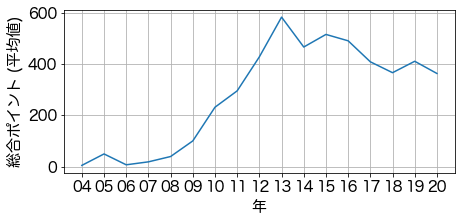

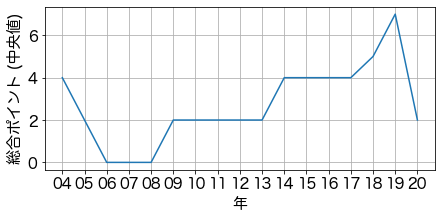

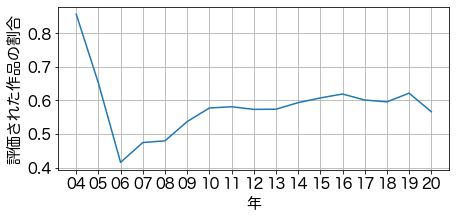

In [13]:
detail_df['day'] = [date[:10] for date in list(detail_df['general_firstup'])]
detail_df['year'] = [date[:4] for date in list(detail_df['general_firstup'])]
years = detail_df.groupby('year').median()['global_point'].index

plt.rcParams['font.size'] = 15

plt.figure(figsize=(7, 3))
plt.plot([year[2:] for year in years], detail_df.groupby('year').mean()['global_point'])
plt.grid()
plt.xlabel('年')
plt.ylabel('総合ポイント (平均値)')
plt.show()

plt.figure(figsize=(7, 3))
plt.plot([year[2:] for year in years], detail_df.groupby('year').median()['global_point'])
plt.grid()
plt.xlabel('年')
plt.ylabel('総合ポイント (中央値)')
plt.show()

plt.figure(figsize=(7, 3))
plt.plot([year[2:] for year in years], detail_df.groupby('year').mean()['is_evaluated'])
plt.grid()
plt.xlabel('年')
plt.ylabel('評価された作品の割合')
plt.show()

In [14]:
def preprocessing(text):
    text = re.sub('\n', '', text)
    text = re.sub('\r', '', text)
    text = re.sub(' ', '', text)
    text = re.sub('　', '', text)
    return text

In [15]:
def count_noun_number(mecab, text):
    text = str(text)
    c = []
    for line in mecab.parse(text).splitlines():
        try:
            if "名詞" in line.split()[-1]:
                c.append(line)
        except:
            pass
    return len(set(c))

In [16]:
mecab = MeCab.Tagger("-Ochasen")

In [17]:
for column in ['title', 'story', 'text']:
    detail_df[column + '_length'] = detail_df[column].apply(lambda x: len(str(x)))

In [18]:
detail_df['keyword_number'] = detail_df['keyword'].apply(lambda x: len(str(x).split(' ')))

In [19]:
detail_df['noun_proportion_in_text'] = detail_df.text.apply(lambda x: count_noun_number(mecab, str(x)) / len(str(x)))

# Feature Engineering

In [20]:
use_columns = ['genre', 'novel_type', 'end', 'general_all_no', 'isstop', 'isr15', \
                        'isbl', 'isgl', 'iszankoku', 'istensei', 'istenni', 'pc_or_k', 'is_evaluated', \
                        'title_length', 'story_length', 'text_length', 'keyword_number', 'noun_proportion_in_text', 'year']
detail_sup_df = detail_df[use_columns]

In [21]:
detail_sup_df.head()

,genre,novel_type,end,general_all_no,isstop,isr15,isbl,isgl,iszankoku,istensei,istenni,pc_or_k,is_evaluated,title_length,story_length,text_length,keyword_number,noun_proportion_in_text,year
0,9903.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,8,299,333,6,0.132132,2020
1,201.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1,40,573,2717,15,0.099006,2020
2,201.0,1.0,1.0,29.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1,35,322,6095,15,0.087941,2020
3,201.0,1.0,1.0,224.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1,11,180,3063,12,0.116552,2019
4,306.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,8,214,759,15,0.098814,2020


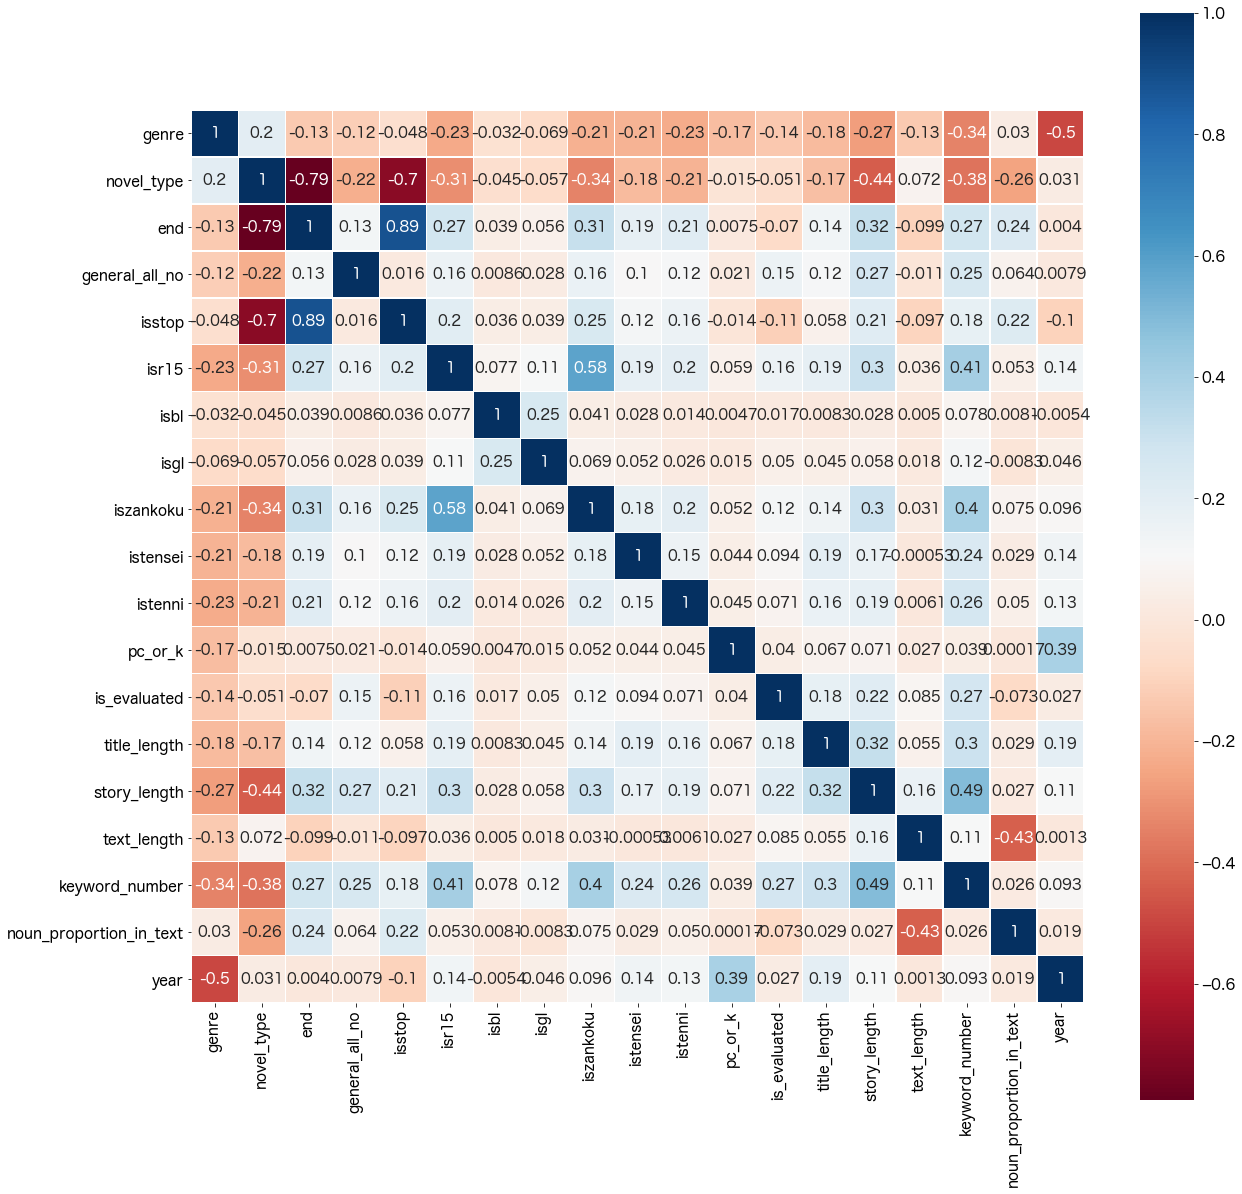

In [25]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    detail_sup_df.astype(float).corr(), linewidths=0.1, vmax=1.0, 
    square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True
)
plt.show()

isstopとendの相関係数が非常に高い。多重共線性を除くためにisstopを除去する。

In [ ]:
detail_sup_df.drop('isstop', axis=1).to_csv('./dataset/csv/detail_text_with_sup.csv', index=False)